# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [2]:
train_data = pd.read_csv("train.csv")
print(train_data.shape)
test_data = pd.read_csv("test.csv")
print(test_data.shape)

(891, 12)
(418, 11)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
y_train = train_data["Survived"]

# important features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
train_data = train_data[features]
test_data = test_data[features]

# mapping data and filling missing values
genders = {'male': 1, 'female': 0}
embark = {'S': 0, 'Q': 1, 'C': 2}
data = [train_data, test_data]
for d in data:
  d["Sex"] = d["Sex"].map(genders)
  d["Embarked"] = d["Embarked"].map(embark)
  d["Age"].fillna(d["Age"].mean(),inplace=True)
  d["Fare"].fillna(d["Fare"].mean(),inplace=True)
  d["Embarked"].fillna(d["Embarked"].median(),inplace=True)

In [8]:
train_data["Embarked"].unique()

array([0., 2., 1.])

In [9]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0


In [10]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


# Splitting the Data into Train, Validation Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, y_train, test_size=0.1, random_state=42, shuffle=True)

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_train.shape

(801, 7)

# Implementing Pipeline Using SVC (Support Vector Classifier)

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(X_train)

enc.transform(X_train).toarray()
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_val)
pipe_svc.score(X_val, y_val)

0.8222222222222222

# Implementing Pipeline Using GaussianNB Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB

enc = OneHotEncoder().fit(X_train)
enc.transform(X_train).toarray()

pipe_gnb = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])

pipe_gnb.fit(X_train, y_train)
y_pred = pipe_gnb.predict(X_val)
pipe_gnb.score(X_val, y_val)

0.7888888888888889

# Calculating the Time Taken by GaussianNB

In [15]:
%%timeit
enc = OneHotEncoder().fit(X_train)
enc.transform(X_train).toarray()

pipe_gnb = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])

pipe_gnb.fit(X_train, y_train)
y_pred = pipe_gnb.predict(X_val)
pipe_gnb.score(X_val, y_val)

2.55 ms ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
from sklearn.metrics import confusion_matrix

cm_gnb = confusion_matrix(y_val, y_pred)
cm_gnb

array([[41, 13],
       [ 6, 30]], dtype=int64)

<AxesSubplot:>

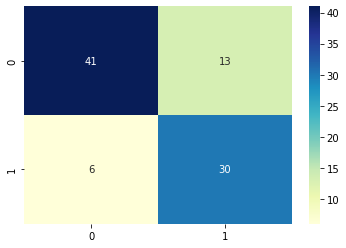

In [17]:
sns.heatmap(cm_gnb, annot=True, cmap="YlGnBu", fmt='g')

# Implementing Pipeline Using BernoulliNB Classifier

In [18]:
from sklearn.naive_bayes import BernoulliNB

enc = OneHotEncoder().fit(X_train)
enc.transform(X_train).toarray()

pipe_bnb = Pipeline([('scaler', StandardScaler()), ('bnb', BernoulliNB())])
pipe_bnb.fit(X_train, y_train)

y_pred = pipe_bnb.predict(X_val)
pipe_bnb.score(X_val, y_val)

0.8

# Calculating the Time Taken by BernoulliNB

In [19]:
%%timeit
enc = OneHotEncoder().fit(X_train)
enc.transform(X_train).toarray()

pipe_bnb = Pipeline([('scaler', StandardScaler()), ('bnb', BernoulliNB())])
pipe_bnb.fit(X_train, y_train)

y_pred = pipe_bnb.predict(X_val)
pipe_bnb.score(X_val, y_val)

2.73 ms ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Confusion Matrix of BernoulliNB

In [20]:
cm_bnb = confusion_matrix(y_val, y_pred)
cm_bnb

array([[43, 11],
       [ 7, 29]], dtype=int64)

<AxesSubplot:>

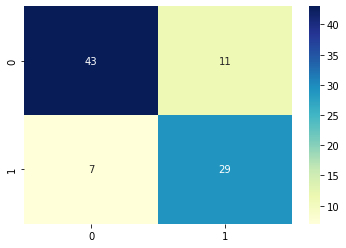

In [21]:
sns.heatmap(cm_bnb, annot=True, cmap="YlGnBu", fmt='g')

# Implementing Cross Validation

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=42, shuffle=True)

### Accuracy

In [23]:
accuracy_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Accuracy of GaussianNB: ", np.mean(accuracy_gnb))
accuracy_bnb = cross_val_score(pipe_bnb, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Accuracy of BernoulliNB: ", np.mean(accuracy_bnb))

Mean Accuracy of GaussianNB:  0.7890123456790124
Mean Accuracy of BernoulliNB:  0.7666358024691358


### Precision

In [24]:
precision_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=cv, scoring='precision')
print("Mean Precision of GaussianNB: ", np.mean(precision_gnb))
precision_bnb = cross_val_score(pipe_bnb, X_train, y_train, cv=cv, scoring='precision')
print("Mean Precision of BernoulliNB: ", np.mean(precision_bnb))

Mean Precision of GaussianNB:  0.7260289362756156
Mean Precision of BernoulliNB:  0.6975861502733466


### Recall

In [25]:
recall_gnb = cross_val_score(pipe_gnb, X_train, y_train, cv=cv, scoring='recall')
print("Mean Recall of GaussianNB: ", np.mean(recall_gnb))
recall_bnb = cross_val_score(pipe_bnb, X_train, y_train, cv=cv, scoring='recall')
print("Mean Recall of BernoulliNB: ", np.mean(recall_bnb))

Mean Recall of GaussianNB:  0.7237414742120625
Mean Recall of BernoulliNB:  0.6980816830228596


# Plotting ROC-AUC Score for GaussianNB

In [26]:
y_score = pipe_gnb.predict_proba(X_val)[:, 1]

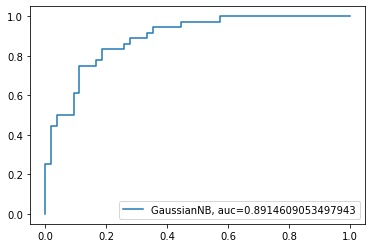

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_val,  y_score)
auc = roc_auc_score(y_val, y_score)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting ROC-AUC Score for BernoulliNB

In [28]:
y_score = pipe_bnb.predict_proba(X_val)[:, 1]

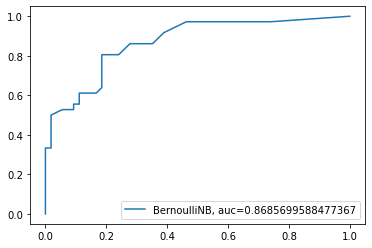

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_val,  y_score)
auc = roc_auc_score(y_val, y_score)
plt.plot(fpr,tpr,label="BernoulliNB, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# End Result

* GaussianNB has a 0.89 auc whereas BernoulliNB has 0.86 auc
* **Time taken by GaussianNB pipeline** 
* 2.57 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
* **Time taken by BernoulliNB pipeline**
* 2.7 ms ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
* Cross Validation Score of GaussianNB is better than BernoulliNB by 0.2